# Project: Investigating Noshow_Appointments

### BY TINIKA DARDEN
### DATE : AUGUST 21, 2022

## Table of Contents

-[Introduction](#intro)

-[Data Make-Over](#data)

-[Exploring Data Analysis](#explore)

-[Conclusion](#conclusion)

<a id='intro'></a>
## [Introduction](#intro)
<p style=><p>
 

><p style="color:purple">For this, "Investigate_a_Dataset" project we're working with a dataset focusiong on noshows to doctor appointments,\. The healthcare aspect was relateable to working in healthcare, and incorporating current knowledge while analyzing the topic's information. The initial question at hand is," Is there a correlation between patient's not showing up to their appointment, and what characteristics may be associated with it?".  In this data set the columns are composed of; PatientID , AppointmentID, Gender,ScheduledDay, AppointmentDay, Age, Neighborhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.  <p>



### Question(s) for Analysis
><p style="color:purple"> As mentioned in the introduction, what data can help us figure out why patients aren't showing up for their appointments. Neighborhoods may be something that can be used to group data to pose the question of,"Do patients from certain neighborhoods miss more appointments than another neighborhood?". Since Scholarship is Brazil's government assistance programs,"Do patients that don't have a Scholarship make up more of the noshow_appointments?".

In [2]:
# Use import statements for the packages that will be used.
import pandas as pd
import numpy as np
import geopandas as gdp
import matplotlib.pyplot as plt
import seaborn as sns

plt.show(sns)
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='Makeover'></a>
## [Data Make-Over](#data)

><p style="color:DarkOrchid">The file where the information on No-show appointments is, "noshowappointments-kagglev2-may-2016.csv". After loading this file, cleaninng, organizing and dropping of nonpertinent information will occur so that we can easily come to a conclusion to answer any questions throughout the project. <p>


### General Properties


In [4]:
#Loading the datasheet into a small preview to see the various columns.
NSA_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
NSA_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#Lets pull up an overall view of our information.
NSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
NSA_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
#Dataset shape/size
NSA_df.shape

(110527, 14)

In [8]:
NSA_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
NSA_df.describe().Age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
#returns the number of unique values for each column
NSA_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
#Returns any missing values
NSA_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [12]:
#Check dataset for duplicates.
sum(NSA_df.duplicated())

0

### Data Rinse Cycle
>  We're going to go through the columns and get rid of anything repetitive or not crucial to answering the questions posed. 
 With a patientID and an appt ID to identify the patient and their visit I am going to drop the appointmentID. There is information on when the appointment was scheduled and the actual appt date. I am going to drop the scheduledday since we're more concerned about the day of the appt.

In [13]:
#Let's rename our columns so they're readable and spelled correctly.
NSA_df.rename(columns = {'Hipertension': 'Hypertension', 'PatientId': 'Patient_ID', 'AppointmentDay': 'Appointment_Day',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [14]:
#Drop unwanted information
NSA_df.drop(['AppointmentID', 'ScheduledDay'], axis = 1, inplace = True)

In [15]:
#Change appointmet time to a datetime dataset type.
NSA_df['Appointment_Day'] = pd.to_datetime(NSA_df['Appointment_Day'])

In [16]:
new_column = NSA_df['No_show']

# create a new column named "attend" contain the same data from "No_show" 
NSA_df['Attend'] = new_column

# check if correct
NSA_df.head()

,Patient_ID,Gender,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Attend
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No


In [17]:

new_column = NSA_df['No_show']

# create a new column named "absent" contain the same data from "No_show" 
NSA_df['Absent'] = new_column

# check 
NSA_df.head()

,Patient_ID,Gender,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Attend,Absent
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No,No
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No,No
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,No,No
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No,No
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No,No


In [18]:
NSA_df.Attend.replace(to_replace ="No",
                 value =1, inplace=True)

# replace values in column "attend" , value "yes" with 0 (int)
NSA_df.Attend.replace(to_replace ="Yes",
                 value =0, inplace=True)

# check 
NSA_df.head()

,Patient_ID,Gender,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Attend,Absent
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,No
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,No
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,No
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,No
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,No


In [19]:
NSA_df.Absent.replace(to_replace ="Yes",
                 value =1, inplace=True)

# replace values in column "absent" , value "No" with 0 (int) 
NSA_df.Absent.replace(to_replace ="No",
                 value =0, inplace=True)

# check 
NSA_df.head()

,Patient_ID,Gender,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Attend,Absent
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [20]:
# https://knowledge.udacity.com/questions/886036. Learning how to expand my result menu.
pd.set_option('display.max_rows', 1000)

In [21]:
#Split the no-show and showed up patients.
NSA_df_Neighbourhood_Attend = NSA_df.groupby(['Neighbourhood'])['Attend'].sum()

NSA_df_Neighbourhood_Attend = pd.DataFrame(NSA_df_Neighbourhood_Attend)

NSA_df_Neighbourhood_Attend = NSA_df_Neighbourhood_Attend.sort_values('Attend', ascending=False)

<a id='eda'></a>
## [Exploratory Data Analysis](#explore)



### Do neighbourhoods have anything to do with patients not showing up for appointments?

In [22]:
#let's see what Neighborhoods have for no show appointments.
NSA_df.groupby(["Absent", "Neighbourhood"]).size().unstack("Absent")

Absent,0,1
Neighbourhood,,
AEROPORTO,7.0,1.0
ANDORINHAS,1741.0,521.0
ANTÔNIO HONÓRIO,221.0,50.0
ARIOVALDO FAVALESSA,220.0,62.0
BARRO VERMELHO,332.0,91.0
BELA VISTA,1523.0,384.0
BENTO FERREIRA,665.0,193.0
BOA VISTA,254.0,58.0
BONFIM,2223.0,550.0


In [23]:
#Viewing the Neighbourhood that appears the most for no-show appts.
NSA_df.Neighbourhood.mode()

0    JARDIM CAMBURI
Name: Neighbourhood, dtype: object

In [24]:
#assign a new DataFrame with the "Neighbourhood" column
#sum of the patients who attend their appointments 
NSA_df_Neighbourhood_Attend=NSA_df.groupby(['Neighbourhood'])['Attend'].sum()

#create a DataFrame
NSA_df_Neighbourhood_Attend=pd.DataFrame(NSA_df_Neighbourhood_Attend)

# sort the by the largest value of the attend column 
NSA_df_Neighbourhood_Attend=NSA_df_Neighbourhood_Attend.sort_values("Attend", ascending=False)

#check ouput 
NSA_df_Neighbourhood_Attend

,Attend
Neighbourhood,
JARDIM CAMBURI,6252
MARIA ORTIZ,4586
RESISTÊNCIA,3525
JARDIM DA PENHA,3246
SANTA MARTHA,2635
CENTRO,2631
ITARARÉ,2591
TABUAZEIRO,2559
SANTO ANTÔNIO,2262


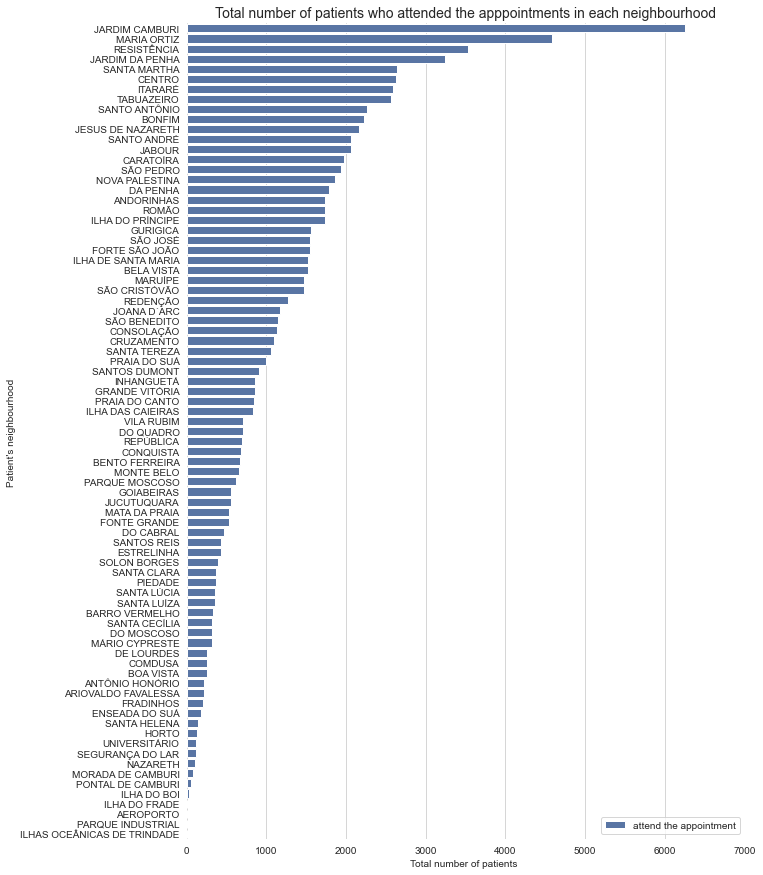

In [25]:
# set the backgroun color and grid:
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the patients that attend the appointment by sorting from the max values to the min 
sns.set_color_codes()
sns.barplot(x='Attend', y= NSA_df_Neighbourhood_Attend.index, data=NSA_df_Neighbourhood_Attend,
            label="attend the appointment", color="b")

# Add legend and informative axis label and title
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7000), ylabel="Patient's neighbourhood ",
       xlabel="Total number of patients ")
ax.set_title("Total number of patients who attended the apppointments in each neighbourhood",fontsize=14)
sns.despine(left=True, bottom=True)

In [26]:
#assign new DataFrame with "Neighbourhood" column
#sum of the patients who were absent from their appointments 
NSA_df_Neighbourhood_Absent=NSA_df.groupby(['Neighbourhood'])['Absent'].sum()

#create a DataFrame
NSA_df_Neighbourhood_Absent=pd.DataFrame(NSA_df_Neighbourhood_Absent)

# sort the by the largest value of the absent column 
NSA_df_Neighbourhood_Absent=NSA_df_Neighbourhood_Absent.sort_values("Absent", ascending=False)

#check ouput 
NSA_df_Neighbourhood_Absent

,Absent
Neighbourhood,
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,906
CENTRO,703
JESUS DE NAZARETH,696
JARDIM DA PENHA,631
CARATOÍRA,591
TABUAZEIRO,573


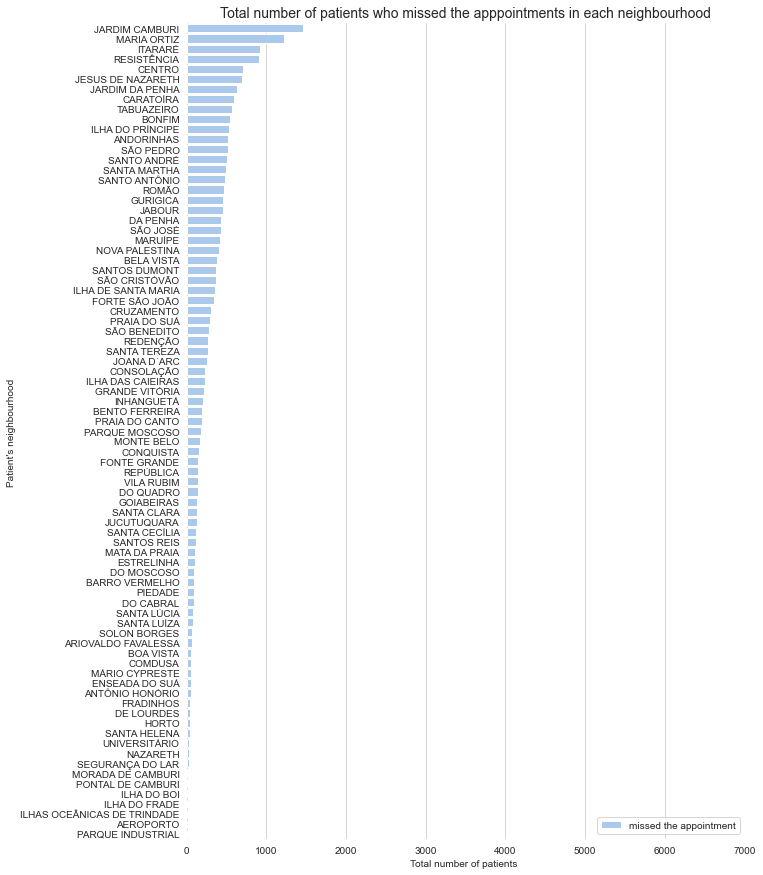

In [27]:
# set the backgroun color and grid:
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plot the patients that missed the appointment by sorting from the max values to the min 
sns.set_color_codes("pastel")
sns.barplot(x='Absent', y= NSA_df_Neighbourhood_Absent.index, data=NSA_df_Neighbourhood_Absent,
            label="missed the appointment", color="b")

# Add legend and detailed axis label and title
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7000), ylabel="Patient's neighbourhood ",
       xlabel="Total number of patients ")
ax.set_title("Total number of patients who missed the apppointments in each neighbourhood",fontsize=14)
sns.despine(left=True, bottom=True)

><p style="color:DarkOrchid">From the given charts we are able to see that the neighbourhood with the most missed appointments is Jardin Camburi(1465). It also has the most patients that atteded their visits with a total of 6252. I am able to see that this particular neighbourhood has a high population so it makes sense for it to place first in both categories. The same can be applied to the neighbourhood Maria Ortiz, attended visits (4586) and missed visits(1219). The neighbourhood that was third in most attended visits is Resistencia(3525), while the third neighbourhood with the most missed appointment is Itarare(923). I will say that the larger the area the more likely their ratio wil reflect a large result.

<a id='eda'></a>
### Does age influece patients not showing up for appointments?

In [28]:
#split into two data frames - one for No_show = No, one for No_show = Yes
NSA_df_att = NSA_df[NSA_df['No_show'] == 'No']
NSA_df_att['Age'].describe()

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [29]:
NSA_df_ab = NSA_df[NSA_df['No_show'] == 'Yes']
NSA_df_ab['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [52]:
#View the groupings of patient's ages.
NSA_df['Age'].value_counts(sort = True)

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 18     1487
 44     1487
 58     1469
 46     1460
 45     1453
 21     1452
 28     1448
 31     1439
 20     1437
 7      1427
 55     1425
 8      1424
 60     1411
 29     1403
 16     1402
 40     1402
 48     1399
 47     1394
 35     1378
 27     1377
 22     1376
 63     1374
 9      1372
 23     1349
 41     1346
 43     1344
 61     1343
 25     1332
 64     1331
 62     1312
 4      1299
 26     1283
 10     1274
 42     1272
 24     1242
 15     1211
 11     1195
 66     1187
 14     1118
 13     1103
 65     1101
 12     1092
 68     1012
 67      973
 69      832
 73      725
 70      724
 71      695
 72      615
 74      602
 76      571
 75      544

In [59]:
# bin edges that will "cut" the data into groups
Bin_Edges = [-1, 18, 37, 55, 115]
# labels for the age groups
Bin_Names = ['0-18','19-37','38-55','56 and above']
Age_Group = pd.cut(NSA_df['Age'], Bin_Edges, labels=Bin_Names)
#insert Age_Group
NSA_df.insert(7, 'Age_Group', Age_Group)
NSA_df.head()

,Patient_ID,Gender,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Age_Group,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Attend,Absent
0,2.987250e+13,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,56 and above,0,0,0,0,No,1,0
1,5.589978e+14,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,56 and above,0,0,0,0,No,1,0
2,4.262962e+12,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,56 and above,0,0,0,0,No,1,0
3,8.679512e+11,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0-18,0,0,0,0,No,1,0
4,8.841186e+12,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,56 and above,1,0,0,0,No,1,0


In [60]:
#I'm going to rearrange the columns.
NSA_df = NSA_df[['Patient_ID', 'Gender', 'Age', 'Age_Group', 'Appointment_Day', 'SMS_received', 'No_show', 'Attend',
                'Absent', 'Scholarship', 'Handicap', 'Alcoholism', 'Diabetes', 'Hypertension', 'Neighbourhood']]

NSA_df.head()

,Patient_ID,Gender,Age,Age_Group,Appointment_Day,SMS_received,No_show,Attend,Absent,Scholarship,Handicap,Alcoholism,Diabetes,Hypertension,Neighbourhood
0,2.987250e+13,F,62,56 and above,2016-04-29 00:00:00+00:00,0,No,1,0,0,0,0,0,1,JARDIM DA PENHA
1,5.589978e+14,M,56,56 and above,2016-04-29 00:00:00+00:00,0,No,1,0,0,0,0,0,0,JARDIM DA PENHA
2,4.262962e+12,F,62,56 and above,2016-04-29 00:00:00+00:00,0,No,1,0,0,0,0,0,0,MATA DA PRAIA
3,8.679512e+11,F,8,0-18,2016-04-29 00:00:00+00:00,0,No,1,0,0,0,0,0,0,PONTAL DE CAMBURI
4,8.841186e+12,F,56,56 and above,2016-04-29 00:00:00+00:00,0,No,1,0,0,0,0,1,1,JARDIM DA PENHA


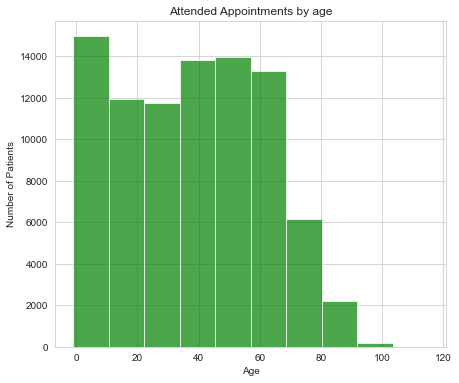

In [30]:
NSA_df_att['Age'].plot(kind='hist', color = 'green', figsize=(7,6), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Attended Appointments by age');


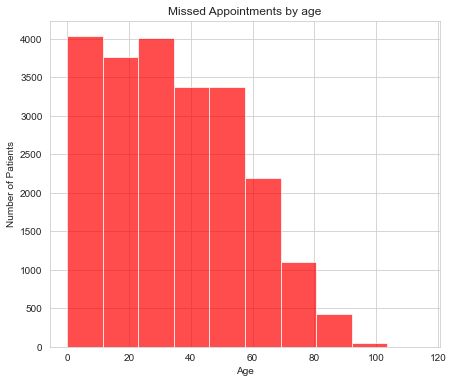

In [159]:
NSA_df_ab['Age'].plot(kind='hist', color='red', figsize=(7,6), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Missed Appointments by age');

<function matplotlib.pyplot.show(close=None, block=None)>

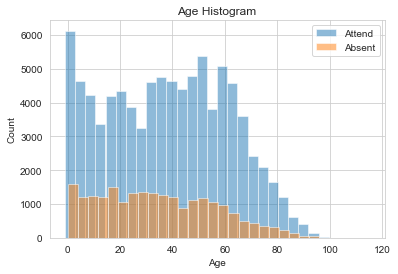

In [175]:
def Age_attendance():
    """"
    A function for ages range of patients who (did/didn't)attended the appointments.
    """

NSA_df_att.Age.hist(alpha=0.5, bins=30,label="Attend")
NSA_df_ab.Age.hist(alpha=0.5, bins=30,label="Absent")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

plt.show

In [171]:
def Age_Group(Age_Group):
    """Displays age groups"""

    if Age_Group <= 18:
        return "0 - 18"
    elif Age_Group <= 37:
        return "19 - 37"
    elif Age_Group <= 55:
        return "38 - 55"
    else:
        return "56 and above"
    

In [172]:
NSA_df['Age_Group'] = NSA_df.Age.apply(Age_Group)
Absent_Age_Group = NSA_df.groupby('Age_Group')['Absent'].mean()
Age_Group = ["0 - 18", "19 - 37", "38 - 55", "56 and above"]
Absent_Age_Group = Absent_Age_Group.reindex(Age_Group)

#Bucketing age into 2 categories + or -40
NSA_df['Age_Group2'] = NSA_df.Age.apply(lambda Age_Group: "0 - 40" if Age_Group <=40 else "Above 40")

#Grouping the age categories and calculate the average no show
Absent_Age_Group2 = NSA_df.groupby('Age_Group2')['Absent'].mean()

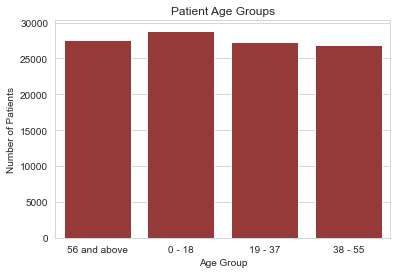

In [173]:
#Display the grouped average(age group)
sns.countplot(data = NSA_df, x = 'Age_Group', color = 'brown')
plt.title('Patient Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

><p style="color:DarkOrchid">The mean age missed appointments is 34 years, while the mean for attended appointments is 37. The Median shows patients who missed appointments were 33 and the median for attended appointments were 38. Both histograms seems to be right-skewed. The age group for patients for mostly attend their appointsments is the mid 30 age range.

### Does Gender influence attended appointments?

In [33]:
NSA_df.groupby(['Gender'])['Age'].mean()

Gender
F    38.893987
M    33.736863
Name: Age, dtype: float64

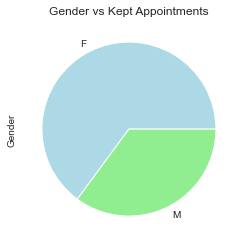

In [34]:
#Pie chart for gender - Female vs Male/ Kept appointments
colors = ['lightblue', 'lightgreen']
NSA_df_att['Gender'].value_counts().plot(kind='pie', colors=colors)
plt.title('Gender vs Kept Appointments');

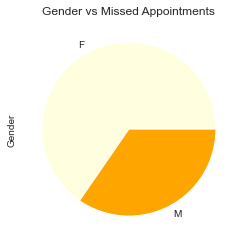

In [41]:
#Pie chart for gender - Female vs Male/ Missed appointments
colors = ['lightyellow', 'orange']
NSA_df_ab['Gender'].value_counts().plot(kind='pie', colors=colors)
plt.title('Gender vs Missed Appointments');

In [78]:
#Display details of what gender missed appointment
NSA_df_ab['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [79]:
#Display details of what gender attended their appointments
NSA_df_att['Gender'].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

><p style="color:DarkOrchid">The gender that attended the appointment the most were women with a count of (57246) while men only attended (30962). More women than men were schedueled to come in for an appointment.

## [Conclusion](#conclusion)

><p style="color:DarkOrchid"> In this project of analyzing data for the, " Medical Appointment No-Show Dataset" I used the Python libraries NumPy, Pandas,Geopandas, Matplotlib, and Seaborn. There were 110,527 appointments made, and about 20% of the patients didn't show for their appointments. Patients are mostly female for the medical appointments. Absent rate decreases with age in the dataset. Patients that were in their late 50s were more likely to miss their appointment than patients younger than 50.


### Do neighbourhoods have anything to do with patients not showing up for appointments?
><p style="color:DarkOrchid"> The dataset shows that the larger neighbourhoods have a correlation with no_show appointments. Jardin Camburi has a very large amount of patients that both attended and were absent from their appointments. While 6252 pattients attended their apointment, 1465 did not. The percentage for No-Show patients is 5.26%. Maria Ortiz has 4586 patients that have attended their appointment and 1219 that were absent. This neighbourhood has a No-Show percentage of 4.76%. The Neighbourhood ILHAS OCEÂNICAS DE TRINDADE had no patients attend their appointment and 2 patients that were absent. This would make a no-show percentage 100% because no one from their neighbourhood attended.

### Does age influece patients not showing up for appointments?
><p style="color:DarkOrchid">Yes, the younger the patient is the more likely they are going to be absent from their appointment. Focusing attention to the group (0-18) who more than not may rely on being accompanied by an adult.


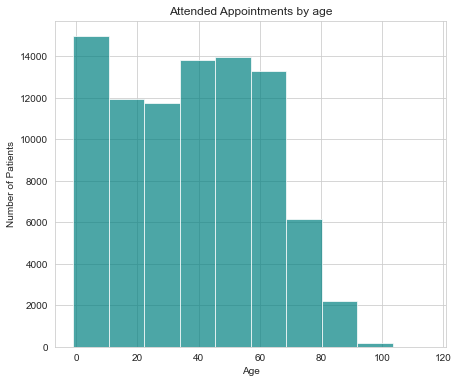

In [74]:
NSA_df_att['Age'].plot(kind='hist', color = 'teal', figsize=(7,6), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Attended Appointments by age');


### Does gender influence attended appointments?
><p style="color:DarkOrchid"> The percentages of No-show patients based on gender wasn't close. The female patients that were absent were 14,594 out of the 22,319 patients that were also absent, this is 65%. Male patients that were absent were 7,725 out of the 22,319 that is 35%. So, female patients were more apt to miss an appointment compared to the male patient.
    For the patient's that did attend their appointment it was the same findings. Female patients that attended their appointment was 57,246 out of 88,208 attending patients make 65%.The male patients that attended their appointments were 30962 out of the 88,208 and that yields a percentage of 35%.
   Female patients are more than likely to attend their appointment than male patients.

### Limitations
><p style="color:DarkOrchid"> The project data needed to have better information in regard to coordinates. A missing feature could be neighbourhood coordinates using geopandas. Geopandas could map areas that may be in close proximity with similar patient results for showing up to their appointments. This would make a better visualization option.  